In [1]:
from selenium import webdriver  #chrome driver 실행하기 위한 라이브러리
from bs4 import BeautifulSoup as bs
import time  #화면 로딩 기다리기 위해 사용
from selenium.webdriver.common.keys import Keys  #엔터 키 누르기 위한 라이브러리
import requests

In [7]:
chromedriver = '/usr/local/bin/chromedriver'  #chrome 드라이버 저장 위치 설정
driver = webdriver.Chrome(chromedriver)  

def goto_search_page(keyword):
    driver.get('https://www.naver.com')  #네이버 접속
    
    time.sleep(0.5)
    search = driver.find_element_by_xpath('//*[@id="query"]')  #검색창 주소
    search_key = keyword
    search.send_keys(search_key)  #검색창에 keyword 입력
    search.send_keys(Keys.ENTER)  #검색 엔터
    
    time.sleep(0.5)
    url = driver.current_url  #현재 링크 받아옴
    url = url.replace('where=nexearch', 'where=blog')  #블로그 검색창 주소로 변환
    driver.get(url)  #블로그 검색창으로 이동
    
    time.sleep(0.5)
    if flag == 1:  #처음 상세 검색 눌러주면 두번째 검색 키워드부터는 상세검색 버튼이 자동으로 눌려져서 화면이 뜨므로, 상세 검색 클릭 필요 없음
        option = driver.find_element_by_xpath('//*[@id="search_option_button"]')  #상세 검색 버튼 주소
        option.click()  #상세 검색 클릭
    
    time.sleep(0.5)
    option = driver.find_element_by_xpath('//*[@id="snb"]/div/ul/li[1]')  #정렬 버튼 주소
    option.click()  #정렬 클릭
    
    time.sleep(0.5)
    option = driver.find_element_by_xpath('//*[@id="snb"]/div/ul/li[1]/div/ul/li[2]')  #최신순 버튼 주소
    option.click()  #최신순 클릭. 데이터 수집용 링크 접속 완료

def get_searched_data(keyword):
    url = driver.current_url  #새로 조회된 링크 받아오기
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")  #최하단으로 스크롤
    for i in range(1,1000): #글이 너무 많으면 멈추지 않으므로 최대 1000번(30*10000=3만 검색결과)까지 조회하도록 설정 
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")  #최하단으로 스크롤
        try:
            before = bs(driver.page_source, 'html.parser').find('li', {'id': f'sp_blog_{30*i}'}).find('span', {'class' : 'sub_time'}).text  #30단위로 검색된 글의 등록시간 받아오기
        except:  #스크롤이 덜 되어서 오류 뜰 경우
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")  #다시 최하단으로 스크롤
            time.sleep(1)  #html 소스 새로고침 되도록 기다리기
            before = bs(driver.page_source, 'html.parser').find('li', {'id': f'sp_blog_{30*i}'}).find('span', {'class' : 'sub_time'}).text  #다시 검색된 글 등록 시간받아오기
        if(before == '어제'):  #등록 시간이 '어제'인 글이 나타날 경우. (칵테일의 경우 검색되는 수가 적어 '3일 전'으로 변경하여 3일동안 검색 결과 수집)
            print(30*i)  #'어제'글이 나타났을 때 잘 발견하고 if문으로 들어왔는지 확인용
            for j in range(30*(i-1)+1,30*i+1):  #마지막 조회된 글의 위에서 30개
                before = bs(driver.page_source, 'html.parser').find('li', {'id': f'sp_blog_{j}'}).find('span', {'class' : 'sub_time'}).text  #정확히 '어제'올라온 글이 언제인지 찾기
                if(before == '어제'):  #처음으로 '어제'인 글이 발견되면
                    count = j  #그때의 글 순서(1일 동안 써진 글의 수)를 저장
                    print(keyword)  #검색했던 키워드 출력
                    print(j)  #1일 동안 써진 글의 수 출력
                    print(' ')
                    break
            break
    return count

#설문조사로 선별된 주류별 맞춤 안주 키워드 리스트
#foods = ['소세지', '치즈', '과일', '스테이크'] #'카나페'           #와인 안주
#foods = ['감바스', '치즈', '과일', '감자튀김'] #'카나페'         #칵테일 안주
#foods = ['전', '계란말이', '족발', '보쌈', '찜', '오징어']          #막걸리 안주
foods = ['회', '오뎅탕', '어묵탕', '곱창', '삼겹살', '닭발']      #소주 안주
#foods = ['치킨', '피자', '감자튀김', '소세지', '과자']             #맥주 안주

drinks = ['소주']#['맥주', '와인', '칵테일', '막걸리']

total = []
global flag
flag = 1  #상세 검색 창은 첫 검색에서만 눌러줘야 하므로 검색 키워드 순서 확인용 변수

for food in range(0,len(foods)):
    for drink in range(0,len(drinks)):
        keywords = '+'+foods[food]+' +'+drinks[drink]  #food와 drink 키워드가 함께 포함된 글 조회
        goto_search_page(keywords)
        result = get_searched_data(keywords)  #검색 실시
        total.append(result)  #결과를 최종 리스트에 추가
        flag = flag+1  #한 키워드 검색 끝나면 1 추가


print(drinks[0]+' 안주 1일간 검색 결과 수')  #분석 대상 출력
print(foods)  #검색한 안주 순서 출력
print(total)  #안주 순서별 검색 결과 수 출력


360
+회 +소주
331
 
60
+오뎅탕 +소주
37
 
60
+어묵탕 +소주
40
 
210
+곱창 +소주
189
 
300
+삼겹살 +소주
276
 
90
+닭발 +소주
74
 
소주 안주 1일간 검색 결과 수
['회', '오뎅탕', '어묵탕', '곱창', '삼겹살', '닭발']
[331, 37, 40, 189, 276, 74]


# 2020.11.26 00:00 기준

### 맥주 안주 1일간 검색 결과 수
['치킨', '피자', '감자튀김', '소세지', '과자']  
[783, 508, 251, 130, 327]

### 소주안주 1일간 검색 결과 수
['회', '오뎅탕', '어묵탕', '곱창', '삼겹살', '닭발']  
[468, 55, 43, 284, 382, 100]

### 막걸리 안주 1일간 검색 결과 수
['전', '계란말이', '족발', '보쌈', '찜', '오징어']  
[555, 13, 45, 58, 79, 63]

### 칵테일 안주 3일간 검색 결과 수
['감바스', '치즈', '과일', '감자튀김', '카나페']  
[82, 453, 264, 95, 11]

### 와인 안주 1일간 검색 결과 수
['소세지', '치즈', '과일', '스테이크', '카나페']  
[41, 706, 330, 387, 10]  

(와인, 칵테일에서 카나페의 경우 30개 이하로 직접 세어줌)

## 2020.11.28 19:00 기준

### 소주 안주 1일간 검색 결과 수

['회', '오뎅탕', '어묵탕', '곱창', '삼겹살', '닭발']  
[331, 37, 40, 189, 276, 74]  

### 와인 안주 1일간 검색 결과 수
  
['소세지', '치즈', '과일', '스테이크']  
[43, 660, 248, 332]  

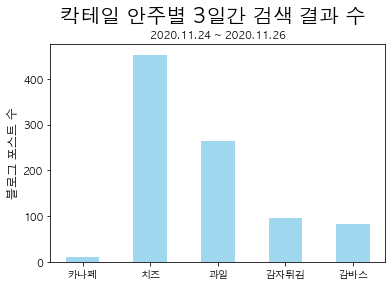

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

path = '/Library/Fonts/AppleGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)

beer_food = ['치킨', '피자', '감자튀김', '소세지', '과자']
beer_searched = [783, 508, 251, 130, 327]
soju_food = ['회', '오뎅탕/어묵탕', '곱창', '삼겹살', '닭발']
soju_searched = [468, 98, 284, 382, 100]
makguli_food = ['전', '계란말이', '족발/보쌈', '찜', '오징어']
makguli_searched = [555, 13, 103, 79, 63]
cocktail_food = ['카나페', '치즈', '과일', '감자튀김', '감바스']
cocktail_searched = [11, 453, 264, 95, 82]
wine_food = ['치즈', '카나페', '과일', '스테이크', '소세지']
wine_searched = [706, 10, 330, 387, 41]

plt.bar(cocktail_food,cocktail_searched, width = 0.5, color='skyblue', alpha = 0.8)
plt.title('2020.11.24 ~ 2020.11.26', fontsize=10)
plt.suptitle('칵테일 안주별 3일간 검색 결과 수', fontsize = 20, y=1.01)
plt.ylabel('블로그 포스트 수', fontsize=12)
plt.show()
